# Principais Dstribuições:

## Normal (Gaussiana):
* possui dois parâmetros, a média ($\overline{x}$), ou seja onde centralizada e a variância ($\sigma^2 > 0 $) que descreve o seu grau de dispersão. Ainda, é comum se referir a dispersão em termos de unidades padrão, ou seja, desvio padrão ($\sigma$). Cabe salientar que como qualquer outro modelo, dependendo dos parâmetros, teremos diferentes distribuições normais.

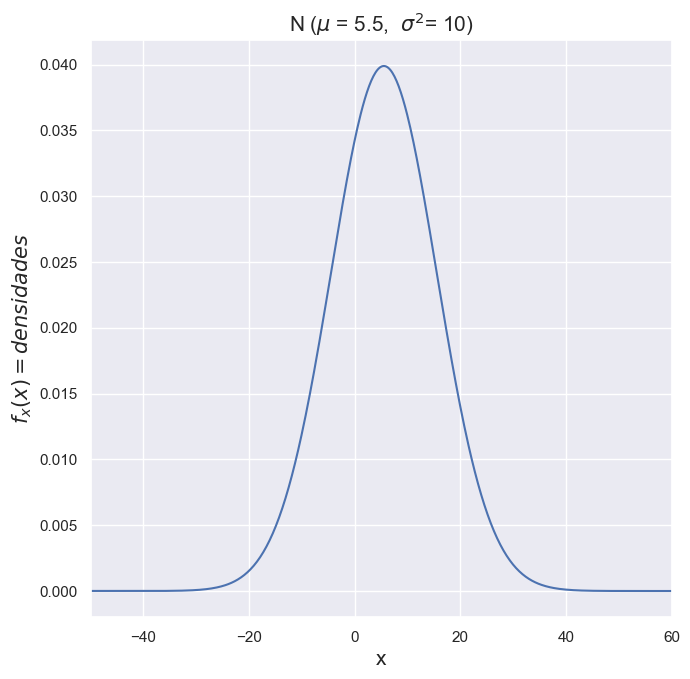

In [143]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
mu = 5.5
std = 10
snd = stats.norm(mu, std)
x = np.linspace(-100, 100, 1000)
#
# Plot the standard normal distribution for different values of random variable
# falling in the range -100, 100
#
plt.figure(figsize=(7.5,7.5))
plt.plot(x, snd.pdf(x))
plt.xlim(5-(mu*std), 5 + (mu*std))
plt.title('N ($\mu$ = {},  $\sigma^2$= {})'.format(mu, std), fontsize='15')
plt.xlabel('x', fontsize='15')
plt.ylabel('$f_x(x) = densidades$', fontsize='15')
plt.show()

## Bernoulli:
* é a distribuição discreta de espaço amostral {0, 1}, que tem valor 1 com a probabilidade de sucesso $p$ e valor 0 com a probabilidade de falha $q=1-p$.

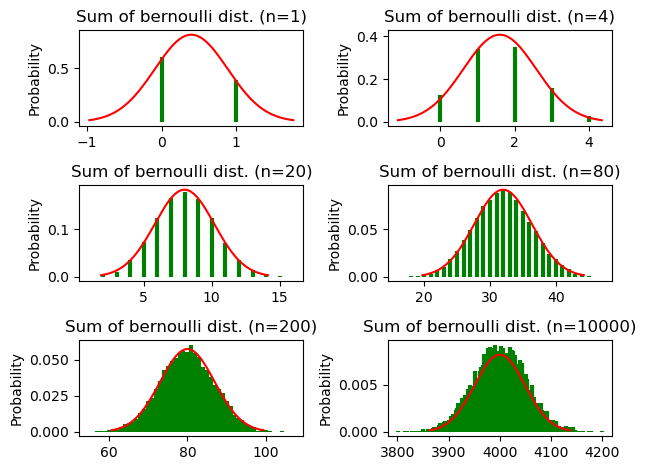

In [35]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def sampling2pmf(n, dist, m=10000):
    """
    n: sample size for each experiment
    m: how many times do you do experiment, fix in 10000
    dist: frozen distribution
    """
    ber_dist = dist
    sum_of_samples = []
    for i in range(m):
        samples = ber_dist.rvs(size=n)
        sum_of_samples.append(np.sum(samples))
    val, cnt = np.unique(sum_of_samples, return_counts=True)
    pmf = cnt / len(sum_of_samples)
    return val, pmf


def plot(n, dist, subplot, plt_handle):
    """
    :param n: sample size
    :param dist: distribution of each single sample
    :param subplot: location of sub-graph, such as 221, 222, 223, 224
    :param plt_handle: plt object
    :return: plt object
    """
    plt = plt_handle
    plt.subplot(subplot)
    mu = n * dist.mean()
    sigma = np.sqrt(n * dist.var())
    samples = sampling2pmf(n=n, dist=dist)
    plt.vlines(samples[0], 0, samples[1],
               colors='g', linestyles='-', lw=3)
    plt.ylabel('Probability')
    plt.title('Sum of bernoulli dist. (n={})'.format(n))
    # normal distribution
    norm_dis = stats.norm(mu, sigma)
    norm_x = np.linspace(mu - 2.8 * sigma, mu + 2.8 * sigma, 10000)
    pdf1 = norm_dis.pdf(norm_x)
    plt.plot(norm_x, pdf1, 'r-')
    return plt

# p = 0.999
size = [1, 4, 20, 80, 200, 10000]

# sum of bernoulli distribution
dist_type = 'bern'
bern_para = [0.4]
single_sample_dist = stats.bernoulli(p=bern_para[0])  # define a bernoulli distribution

# plot by matplotlib
plt.figure(1)
plt = plot(n=size[0], dist=single_sample_dist, subplot=321, plt_handle=plt)
plt = plot(n=size[1], dist=single_sample_dist, subplot=322, plt_handle=plt)
plt = plot(n=size[2], dist=single_sample_dist, subplot=323, plt_handle=plt)
plt = plot(n=size[3], dist=single_sample_dist, subplot=324, plt_handle=plt)
plt = plot(n=size[4], dist=single_sample_dist, subplot=325, plt_handle=plt)
plt = plot(n=size[5], dist=single_sample_dist, subplot=326, plt_handle=plt)
plt.tight_layout()
plt.show()

## Binomial
* O número $r$ de sucesso em um $n$ de teste de Bernoulli com uma probabilidade $p$ de sucesso, é um Bernouli distribuído. 
* O número $r$ de caras em 4 jogadas de moeda com probabilidade de 0.5 de cara, é Binomialmente distribuida

* Usando F.D.A (Função de Probabilidade Acumulada)

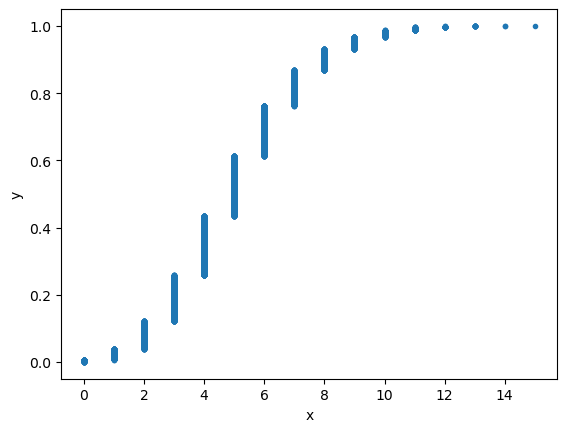

In [139]:
def ecdf(data):
    """Calcula o F.D.A de um array de una dimensão"""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100, 0.05, size=10000)

# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot

plt.show()

* Usando F.D.P (Função de Distribuição de Probabilidade)

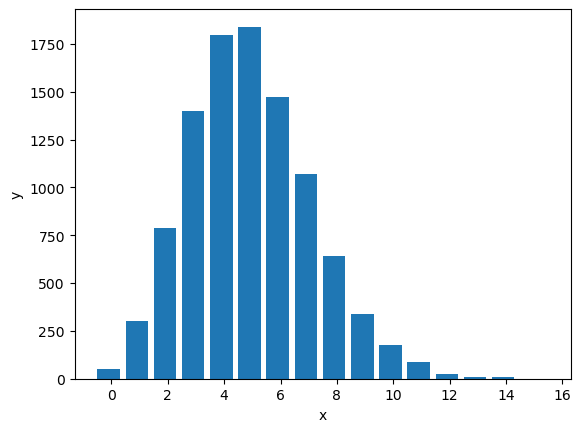

In [115]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, bins=bins, width = .8)

# Label axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

## Uniforme:
* é a probabilidade de se gerar qualquer ponto em um intervalo contido no espaço amostral é proporcional ao tamanho do intervalo.

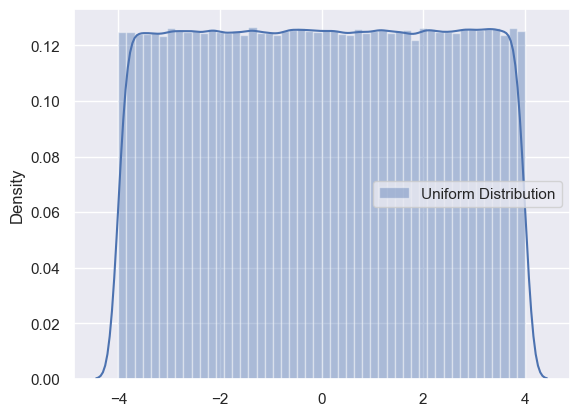

In [144]:
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter("ignore", UserWarning)

# Let's create an array of random numbers from uniform distribution
uniform = np.random.uniform(-4,4,1000000)

# Let's create an array of random numbers from normal distribution

# Let's plot them
ax = sns.distplot(uniform, label='Uniform Distribution')
legend = plt.legend()
plt.show()

## Poisson:
* é uma distribuição de probabilidade de uma variável aleatória discreta, expressa a probabilidade de uma série de eventos ocorrer num certo período de tempo se estes eventos ocorrem independentemente de quando ocorreu o último evento. É aplicável quando o número de possíveis ocorrências discretas é muito maior do que o número médio de ocorrências em um determinado intervalo de tempo ou espaço. Ou seja, é uma distribuição associada a "eventos raros"

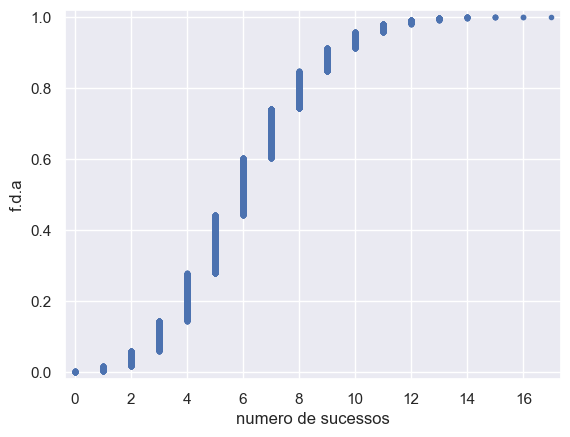

In [161]:
samples = np.random.poisson(6, size=10000)
x, y = ecdf(samples)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('numero de sucessos')
_ = plt.ylabel('f.d.a')
plt.show()

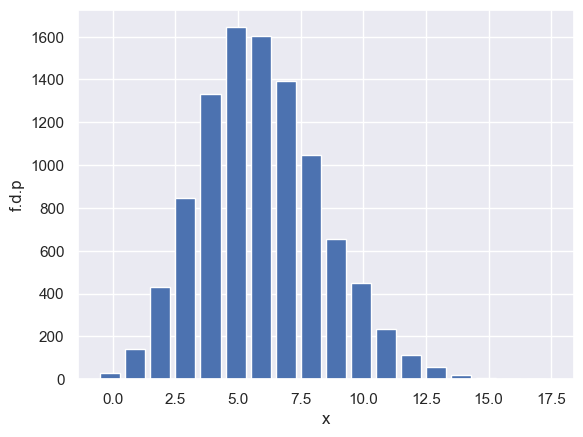

In [162]:
# Compute bin edges: bins
bins = np.arange(0, max(samples) + 1.5) - 0.5

# Generate histogram
plt.hist(samples, bins=bins, width = .8)

# Label axes
plt.xlabel('x')
plt.ylabel('f.d.p')

# Show the plot
plt.show()

* Comparando Poisson com Normal

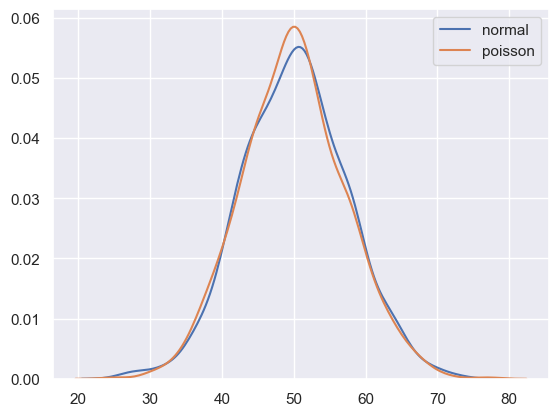

In [167]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.normal(loc=50, scale=7, size=1000), hist=False, label='normal')
sns.distplot(random.poisson(lam=50, size=1000), hist=False, label='poisson')
plt.legend()
plt.ylabel('')
plt.show()

## Distribuição geométrica
* é constituída por duas funções de probabilidade discretas:
    * a distribuição de probabilidade do número X de tentativas de Bernoulli necessárias para alcançar um sucesso, suportadas pelo conjunto {1, 2, 3, ...}, ou
    * a distribuição de probabilidade do número $Y=X-1$ de insucessos antes do primeiro sucesso, suportadas pelo conjunto {0, 1, 2, 3, ...}
* Ou seja, representa a probabilidade de um evento tendo a probabilidade $p$ acontecer (sucesso), depois de um número $x$ de testes de Bernoulli com $x$ assumindo valores de {1, 2, 3, ..., k}    
    

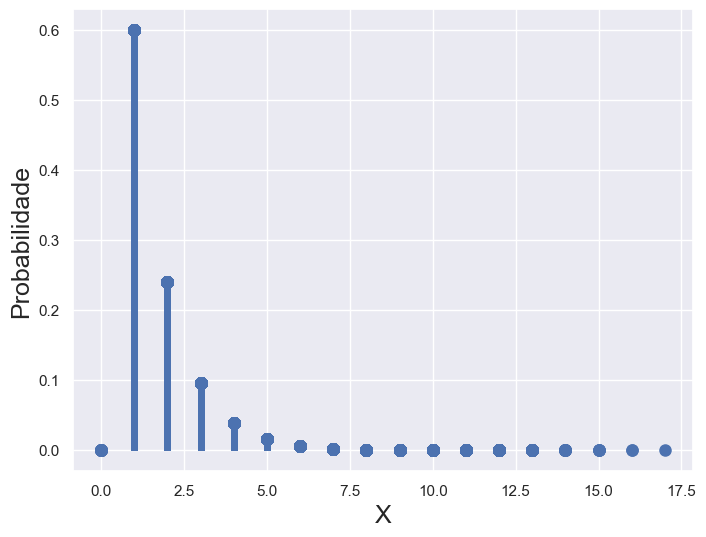

In [190]:
from scipy.stats import geom
import matplotlib.pyplot as plt
X = samples
p = 0.6
#
# Calculate geometric probability distribution
#
geom_pd = geom.pmf(X, p)
#
# Plot the probability distribution
#
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, geom_pd, 'bo', ms=8, label='geom pmf')
plt.ylabel("Probabilidade", fontsize="18")
plt.xlabel("X", fontsize="18")
plt.title("")
ax.vlines(X, 0, geom_pd, colors='b', lw=5, alpha=0.5)
plt.show()

## Conclusão
* Podemos notar que as principais distribuições podem ser aplicadas para conseguirmos conclusões sobre os dados que estamos trabalhando, no mercado financeiro podemos abordá-las com a finalidade de buscar identificar um comportamento das ações e consequentemente criarmos um método eficaz de como obtermos um modelo que opere conseguindo lucro no mercado.